In [ ]:
# Step 1: Data Loading and Initial Inspection (completed)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('Chocolate Sales.csv')

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nDataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB
None

Dataset Shape: (1094, 6)

First 5 rows:


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicates:", df.duplicated().sum())


Missing values:
Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

Number of duplicates: 0


In [ ]:
# Step 2: Data Cleaning (completed)
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# Clean Amount column and convert to numeric
df['Amount'] = df['Amount'].astype(str).str.replace(r'[$,]', '', regex=True)
df['Amount'] = pd.to_numeric(df['Amount'])

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check for outliers
print("\nDescriptive statistics:")
print(df.describe())

# Display cleaned data
print("\nCleaned data info:")
print(df.info())
print("\nFirst 5 rows of cleaned data:")
display(df.head())


Descriptive statistics:
                                Date        Amount  Boxes Shipped
count                           1094   1094.000000    1094.000000
mean   2022-05-03 09:04:56.160877568   5652.308044     161.797989
min              2022-01-03 00:00:00      7.000000       1.000000
25%              2022-03-02 00:00:00   2390.500000      70.000000
50%              2022-05-11 00:00:00   4868.500000     135.000000
75%              2022-07-04 00:00:00   8027.250000     228.750000
max              2022-08-31 00:00:00  22050.000000     709.000000
std                              NaN   4102.442014     121.544145

Cleaned data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184


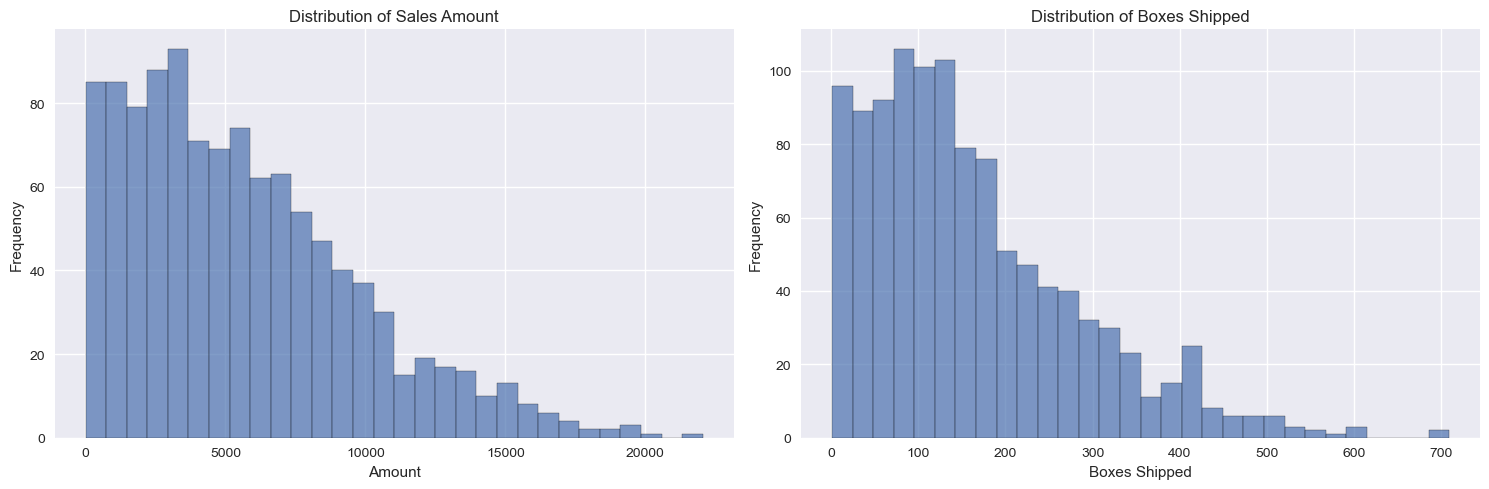

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
# Set style for plots
plt.style.use('seaborn-v0_8')

# 3.1 Distribution of sales amount and boxes shipped
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Amount distribution
axes[0].hist(df['Amount'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Sales Amount')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')

# Boxes shipped distribution
axes[1].hist(df['Boxes Shipped'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Boxes Shipped')
axes[1].set_xlabel('Boxes Shipped')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

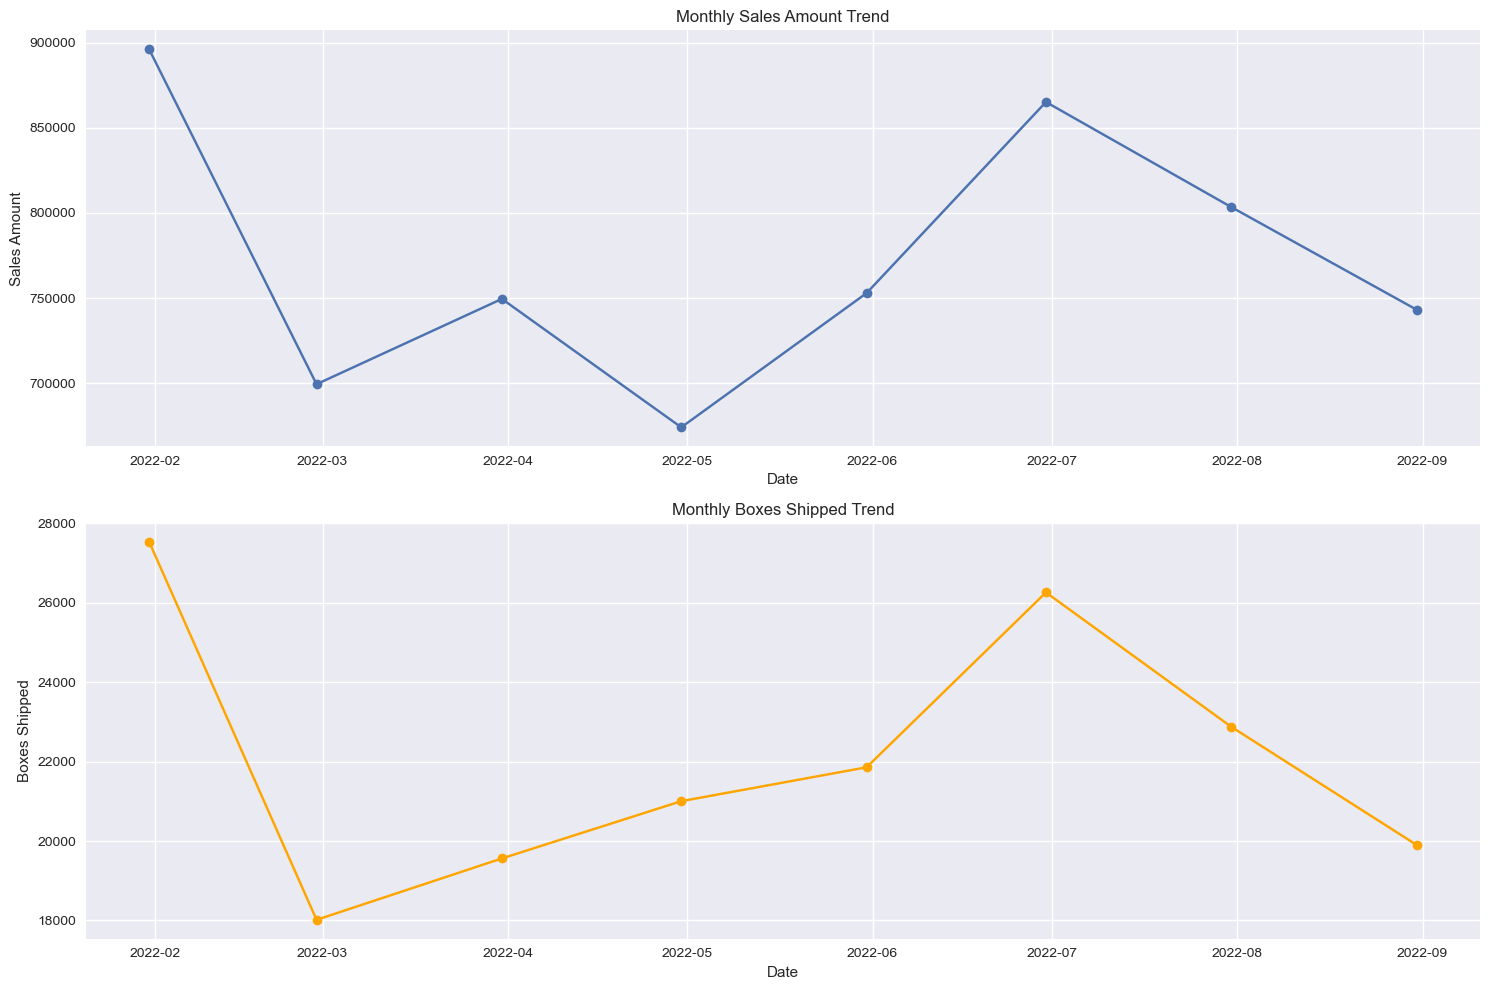

In [ ]:
# 3.2 Sales and revenue trends over time
# Set Date as index for time series analysis
df_time = df.set_index('Date')

# Resample by month
monthly_sales = df_time.resample('M').agg({'Amount': 'sum', 'Boxes Shipped': 'sum'})

# Plot monthly trends
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Monthly sales amount
axes[0].plot(monthly_sales.index, monthly_sales['Amount'], marker='o')
axes[0].set_title('Monthly Sales Amount Trend')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Sales Amount')
axes[0].grid(True)

# Monthly boxes shipped
axes[1].plot(monthly_sales.index, monthly_sales['Boxes Shipped'], marker='o', color='orange')
axes[1].set_title('Monthly Boxes Shipped Trend')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Boxes Shipped')
axes[1].grid(True)

plt.tight_layout()
plt.show()

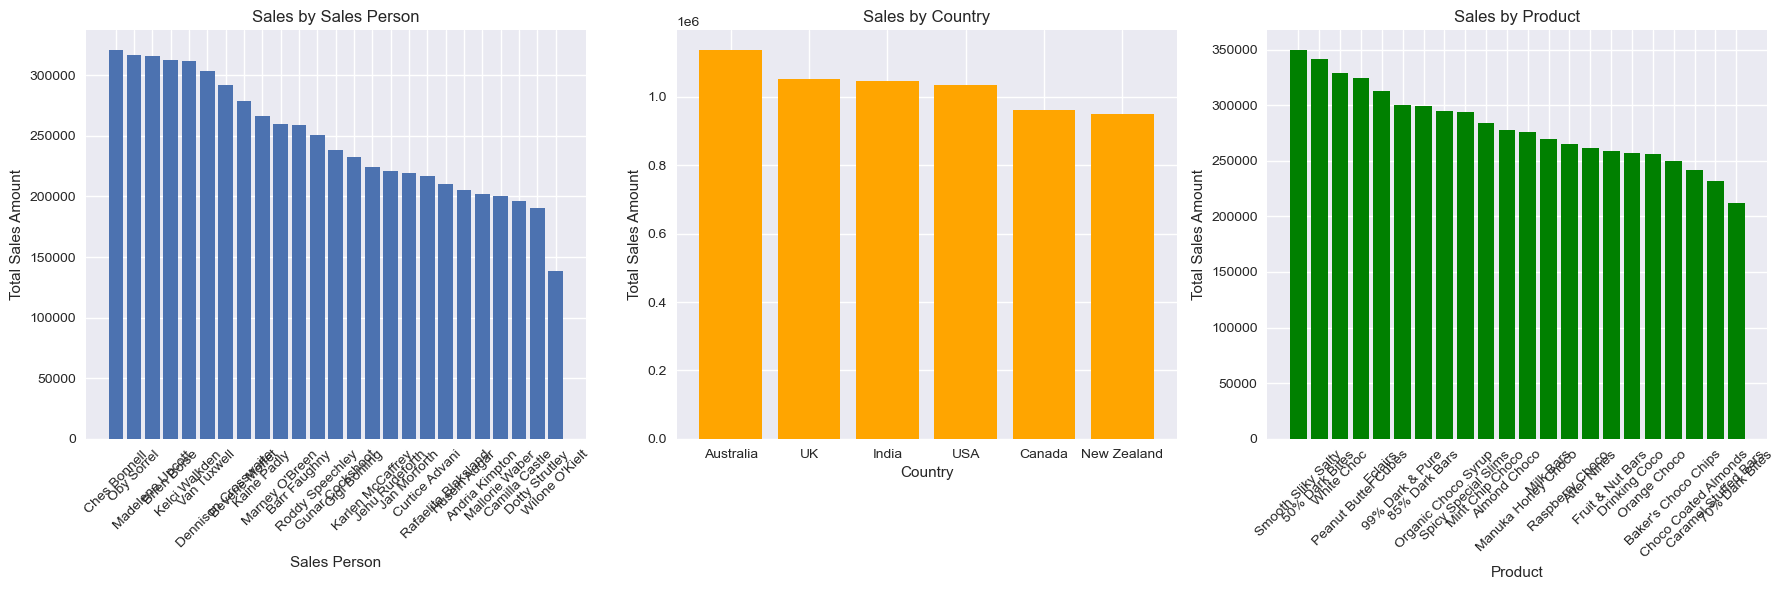

In [ ]:
# 3.3 Analyze sales by different dimensions
# Sales by Sales Person
sales_by_person = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

# Sales by Country
sales_by_country = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

# Sales by Product
sales_by_product = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

# Plot sales by different dimensions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Sales by Person
axes[0].bar(sales_by_person.index, sales_by_person.values)
axes[0].set_title('Sales by Sales Person')
axes[0].set_xlabel('Sales Person')
axes[0].set_ylabel('Total Sales Amount')
axes[0].tick_params(axis='x', rotation=45)

# Sales by Country
axes[1].bar(sales_by_country.index, sales_by_country.values, color='orange')
axes[1].set_title('Sales by Country')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Total Sales Amount')

# Sales by Product
axes[2].bar(sales_by_product.index, sales_by_product.values, color='green')
axes[2].set_title('Sales by Product')
axes[2].set_xlabel('Product')
axes[2].set_ylabel('Total Sales Amount')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

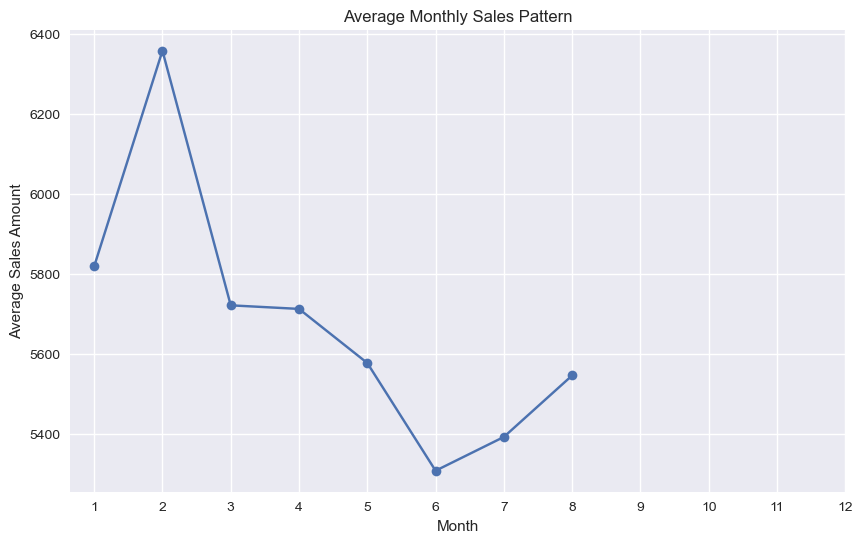

In [ ]:
# 3.4 Identify seasonal patterns
# Extract month and year from Date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter

# Monthly sales pattern
monthly_pattern = df.groupby('Month')['Amount'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_pattern.index, monthly_pattern.values, marker='o')
plt.title('Average Monthly Sales Pattern')
plt.xlabel('Month')
plt.ylabel('Average Sales Amount')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

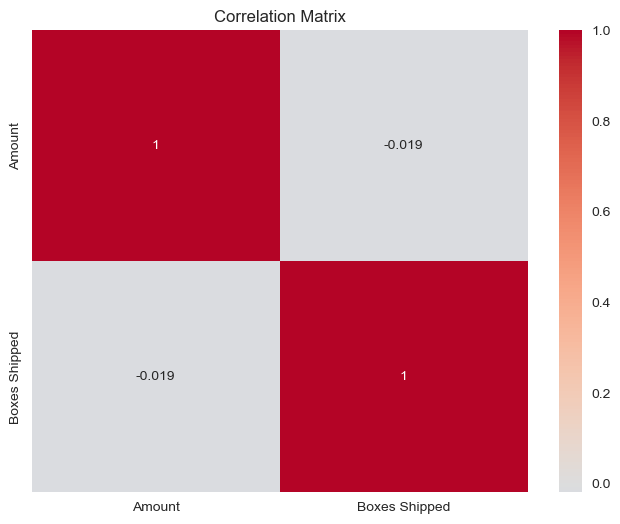

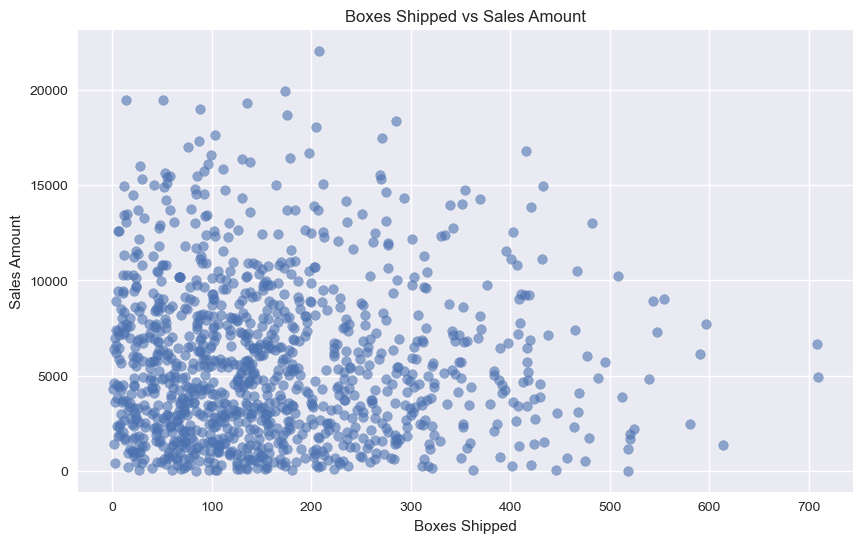

In [ ]:
# 3.5 Examine correlations
correlation_matrix = df[['Amount', 'Boxes Shipped']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Scatter plot of Boxes Shipped vs Amount
plt.figure(figsize=(10, 6))
plt.scatter(df['Boxes Shipped'], df['Amount'], alpha=0.6)
plt.title('Boxes Shipped vs Sales Amount')
plt.xlabel('Boxes Shipped')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

In [ ]:
# Step 4: Feature Engineering
# Create time-based features
df['Day_of_week'] = df['Date'].dt.dayofweek
df['Day_of_month'] = df['Date'].dt.day
df['Week_of_year'] = df['Date'].dt.isocalendar().week

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Sales Person', 'Country', 'Product'], drop_first=True)

# Create lag features (for time series analysis)
df_sorted = df.sort_values('Date').reset_index(drop=True)
df_sorted['Amount_lag1'] = df_sorted['Amount'].shift(1)
df_sorted['Amount_lag7'] = df_sorted['Amount'].shift(7)

# Create rolling averages
df_sorted['Amount_rolling_7'] = df_sorted['Amount'].rolling(window=7).mean()
df_sorted['Amount_rolling_30'] = df_sorted['Amount'].rolling(window=30).mean()

# Drop rows with NaN values from lag features
df_sorted.dropna(inplace=True)

# Display feature engineered dataset
print("Feature engineered dataset shape:", df_sorted.shape)
display(df_sorted.head())

Feature engineered dataset shape: (1065, 16)


,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month,Year,Quarter,Day_of_week,Day_of_month,Week_of_year,Amount_lag1,Amount_lag7,Amount_rolling_7,Amount_rolling_30
29,Curtice Advani,New Zealand,Spicy Special Slims,2022-01-10,4074,469,1,2022,1,0,10,2,700.0,5173.0,2792.0,5458.833333
30,Marney O'Breen,India,Peanut Butter Cubes,2022-01-10,6489,146,1,2022,1,0,10,2,4074.0,2541.0,3356.0,5550.300000
31,Gigi Bohling,UK,Almond Choco,2022-01-10,5642,9,1,2022,1,0,10,2,6489.0,2303.0,3833.0,5499.900000
32,Van Tuxwell,Australia,70% Dark Bites,2022-01-10,7063,104,1,2022,1,0,10,2,5642.0,4676.0,4174.0,5617.733333
33,Brien Boise,UK,Peanut Butter Cubes,2022-01-10,15330,30,1,2022,1,0,10,2,7063.0,1687.0,6123.0,6019.766667


In [ ]:
# Step 5: Data Preparation for Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For time series, we need to maintain temporal order
# Let's use the last 20% of data for testing
test_size = 0.2
split_idx = int(len(df_sorted) * (1 - test_size))

# Prepare features and target
features = df_sorted.drop(['Date', 'Amount'], axis=1)
target = df_sorted['Amount']

# Split data maintaining temporal order
X_train, X_test = features.iloc[:split_idx], features.iloc[split_idx:]
y_train, y_test = target.iloc[:split_idx], target.iloc[split_idx:]

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Boxes Shipped', 'Month', 'Year', 'Quarter', 'Day_of_week',
                  'Day_of_month', 'Week_of_year', 'Amount_lag1', 'Amount_lag7',
                  'Amount_rolling_7', 'Amount_rolling_30']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)




# Drop categorical columns not converted by one-hot encoding
X_train = X_train.drop(columns=['Sales Person', 'Country', 'Product'], errors='ignore')
X_test = X_test.drop(columns=['Sales Person', 'Country', 'Product'], errors='ignore')

# Confirm removal
print("Remaining non-numeric columns in X_train:", X_train.select_dtypes(include=['object']).columns)
print("Remaining non-numeric columns in X_test:", X_test.select_dtypes(include=['object']).columns)
assert X_train.select_dtypes(include=['object']).empty, "X_train still contains non-numeric columns!"
assert X_test.select_dtypes(include=['object']).empty, "X_test still contains non-numeric columns!"


Training set shape: (852, 14)
Test set shape: (213, 14)
Remaining non-numeric columns in X_train: Index([], dtype='object')
Remaining non-numeric columns in X_test: Index([], dtype='object')


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Step 6: Model Development

# Confirm all features in X_train and X_test are numeric
print("Non-numeric columns in X_train:", X_train.select_dtypes(include=['object']).columns)
print("Non-numeric columns in X_test:", X_test.select_dtypes(include=['object']).columns)

# Double-check for any residual categorical columns
assert X_train.select_dtypes(include=['object']).empty, "X_train contains non-numeric columns!"
assert X_test.select_dtypes(include=['object']).empty, "X_test contains non-numeric columns!"

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}
    print(f"{name}: MAE={mae:.2f}, RMSE={rmse:.2f}, MAPE={mape:.4f}")


Non-numeric columns in X_train: Index([], dtype='object')
Non-numeric columns in X_test: Index([], dtype='object')
Linear Regression: MAE=3210.97, RMSE=3918.15, MAPE=3.4032
Random Forest: MAE=3291.78, RMSE=4049.39, MAPE=3.6568
Gradient Boosting: MAE=3366.94, RMSE=4161.39, MAPE=3.6877
XGBoost: MAE=3539.12, RMSE=4341.09, MAPE=3.9648



Model Performance Comparison:


,MAE,RMSE,MAPE
Linear Regression,3210.974643,3918.147743,3.403198
Random Forest,3291.783521,4049.390994,3.656800
Gradient Boosting,3366.936085,4161.387482,3.687712
XGBoost,3539.124000,4341.085671,3.964813


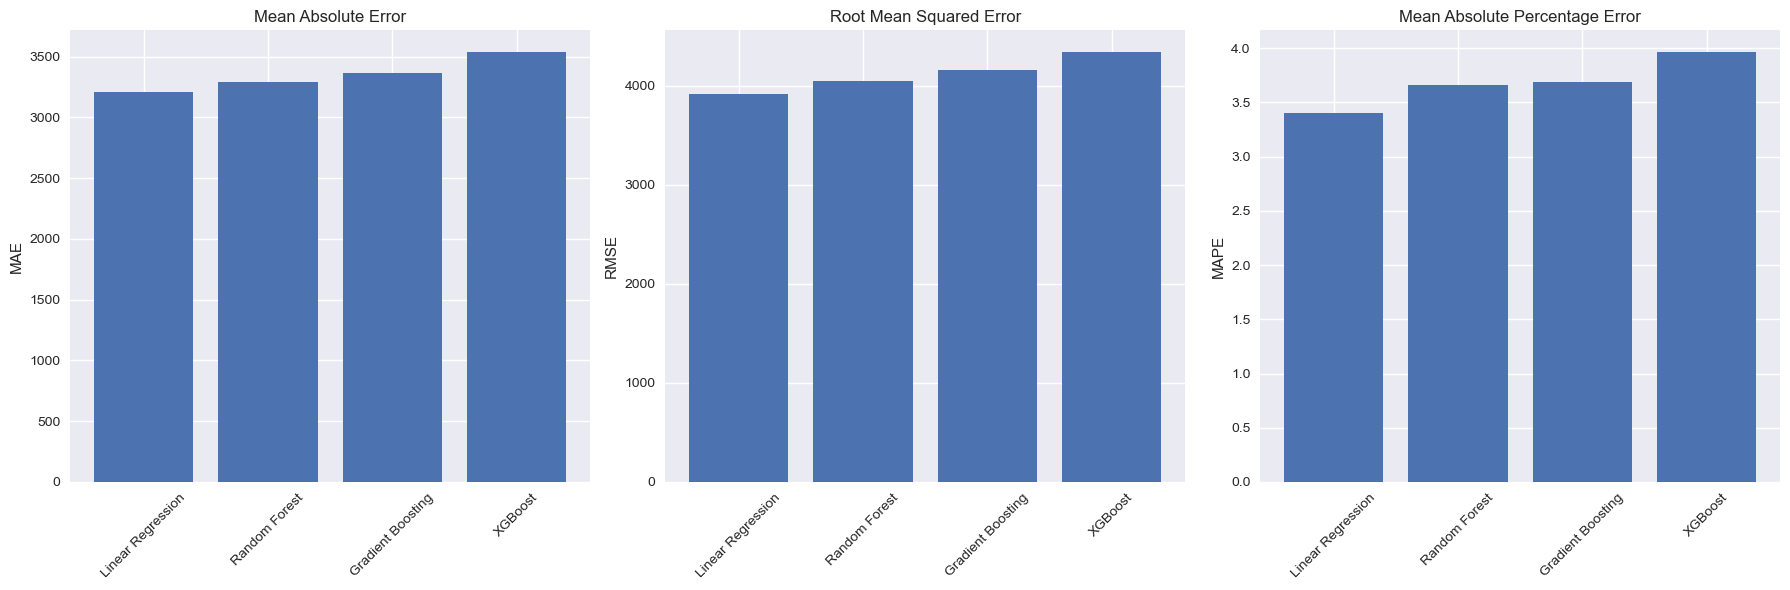

In [ ]:
# Step 7: Model Evaluation
# Compare model performance
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
display(results_df)

# Plot model performance
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

metrics = ['MAE', 'RMSE', 'MAPE']
titles = ['Mean Absolute Error', 'Root Mean Squared Error', 'Mean Absolute Percentage Error']

for i, metric in enumerate(metrics):
    axes[i].bar(results_df.index, results_df[metric])
    axes[i].set_title(titles[i])
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

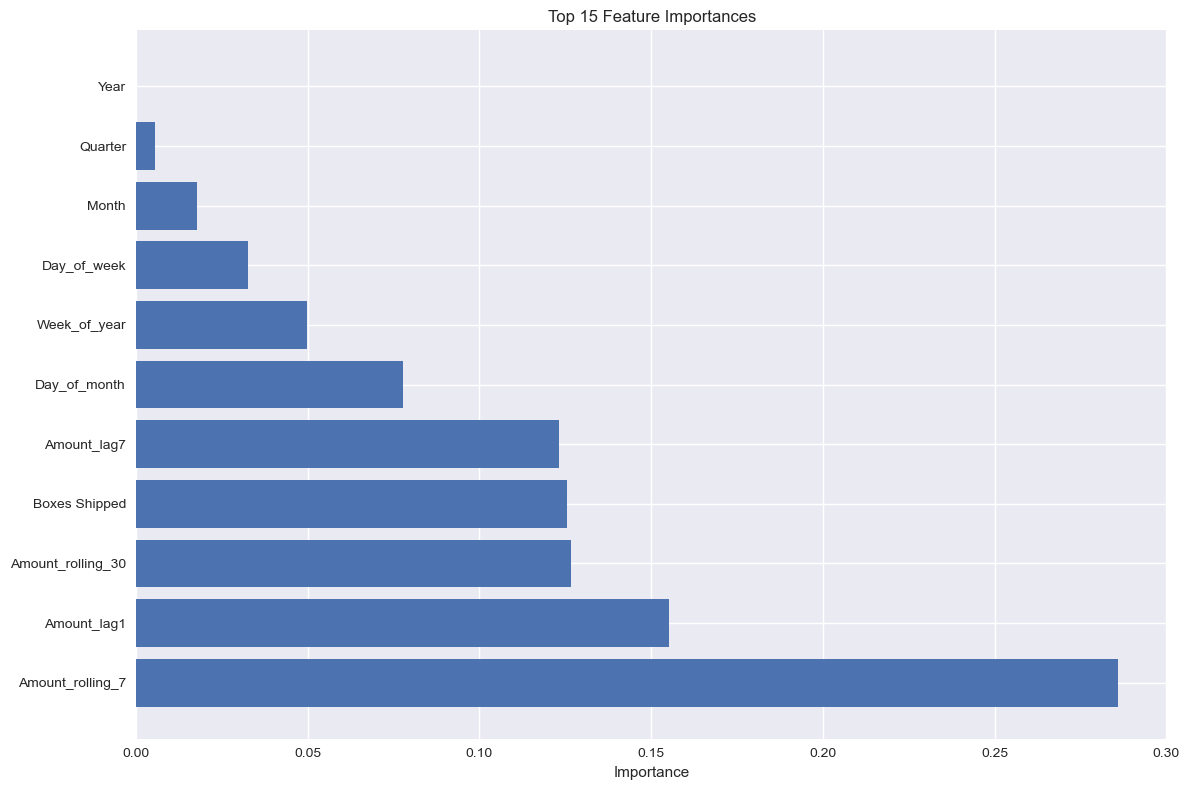

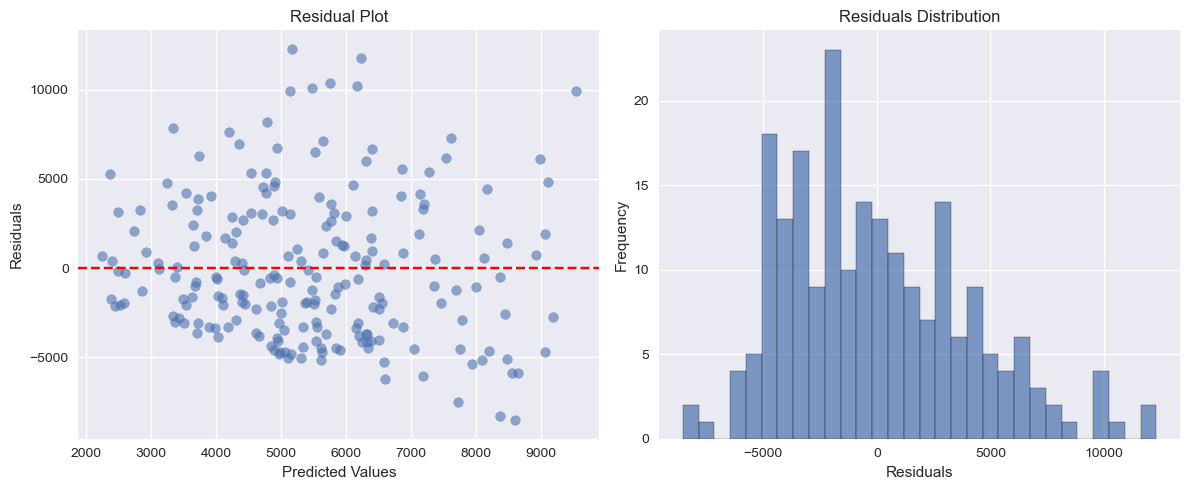

In [ ]:
# Step 8: Model Interpretation
# Feature importance for the best model (Random Forest)
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['feature'][:15], feature_importances['importance'][:15])
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Analyze residuals
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best

plt.figure(figsize=(12, 5))

# Residuals plot
plt.subplot(1, 2, 1)
plt.scatter(y_pred_best, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Residuals distribution
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Missing columns in future_features: set()
Extra columns in future_features: set()


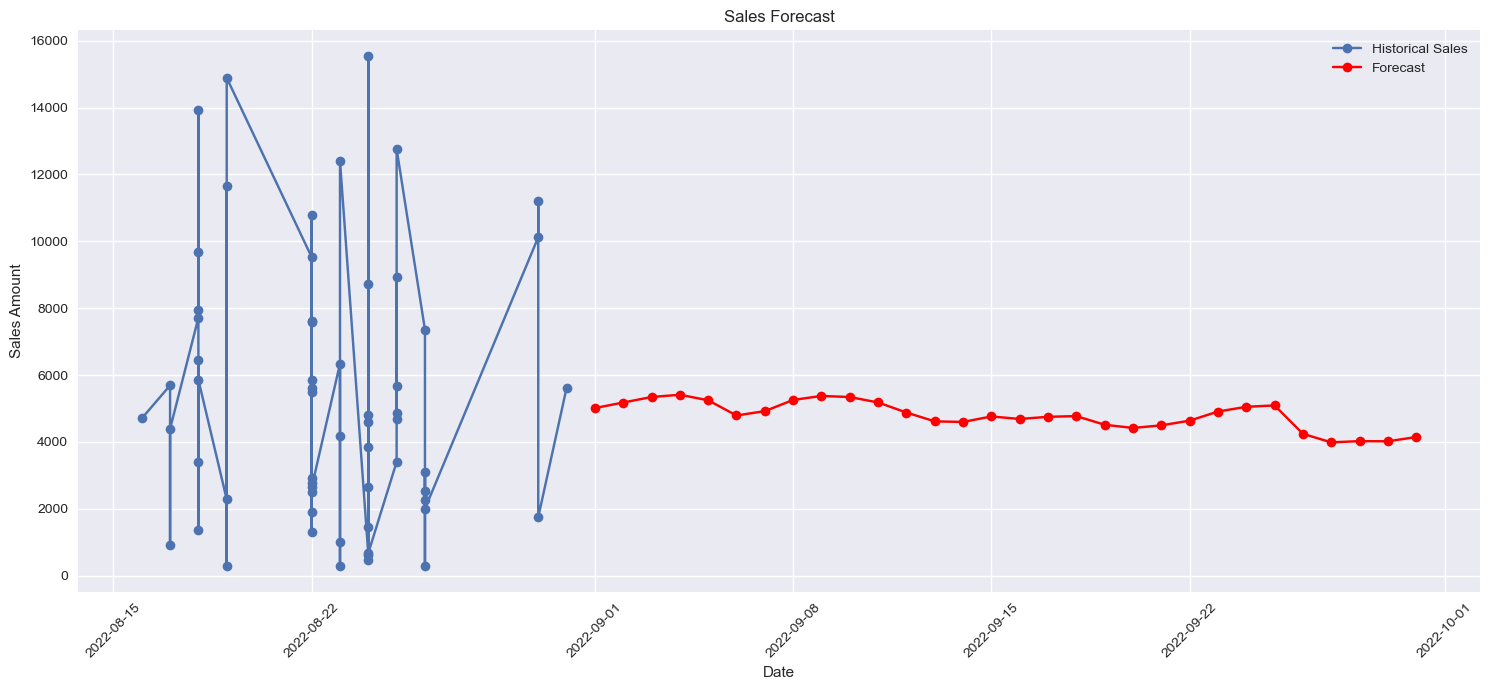

Sales Forecast for Next 30 Days:


,Date,Predicted_Amount
0,2022-09-01,5013.47
1,2022-09-02,5179.37
2,2022-09-03,5343.59
3,2022-09-04,5411.70
4,2022-09-05,5245.87
5,2022-09-06,4791.15
6,2022-09-07,4921.63
7,2022-09-08,5256.09
8,2022-09-09,5376.14
9,2022-09-10,5343.03



Sales Forecast with Confidence Intervals:


,Date,Predicted_Amount,Lower_Bound,Upper_Bound
0,2022-09-01,5013.47,-2941.791473,12968.731473
1,2022-09-02,5179.37,-2775.891473,13134.631473
2,2022-09-03,5343.59,-2611.671473,13298.851473
3,2022-09-04,5411.70,-2543.561473,13366.961473
4,2022-09-05,5245.87,-2709.391473,13201.131473
5,2022-09-06,4791.15,-3164.111473,12746.411473
6,2022-09-07,4921.63,-3033.631473,12876.891473
7,2022-09-08,5256.09,-2699.171473,13211.351473
8,2022-09-09,5376.14,-2579.121473,13331.401473
9,2022-09-10,5343.03,-2612.231473,13298.291473



Model and forecasts saved successfully!


In [ ]:
# Step 9: Forecasting
# For forecasting future periods, we need to create future dates
last_date = df_sorted['Date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# Prepare future dataset (this is a simplified example)
# In a real scenario, we would need to create all the features for future dates
future_df = pd.DataFrame({'Date': future_dates})
future_df['Month'] = future_df['Date'].dt.month
future_df['Year'] = future_df['Date'].dt.year
future_df['Quarter'] = future_df['Date'].dt.quarter
future_df['Day_of_week'] = future_df['Date'].dt.dayofweek
future_df['Day_of_month'] = future_df['Date'].dt.day
future_df['Week_of_year'] = future_df['Date'].dt.isocalendar().week

# For demonstration, let's use the last known values for other features
last_row = df_sorted.iloc[-1:].drop(['Date', 'Amount'], axis=1)
future_features = pd.concat([last_row] * len(future_dates), ignore_index=True)

# Update the time-based features
future_features['Month'] = future_df['Month'].values
future_features['Year'] = future_df['Year'].values
future_features['Quarter'] = future_df['Quarter'].values
future_features['Day_of_week'] = future_df['Day_of_week'].values
future_features['Day_of_month'] = future_df['Day_of_month'].values
future_features['Week_of_year'] = future_df['Week_of_year'].values

# Drop categorical columns as done in training to match feature columns
future_features = future_features.drop(columns=['Sales Person', 'Country', 'Product'], errors='ignore')

# Verify future features have the same columns as training data
missing_cols = set(X_train.columns) - set(future_features.columns)
extra_cols = set(future_features.columns) - set(X_train.columns)

print("Missing columns in future_features:", missing_cols)
print("Extra columns in future_features:", extra_cols)
assert missing_cols == set(), "Some training features are missing in future features"
assert extra_cols == set(), "Future features contain unexpected columns"

# Scale numerical features
future_features[numerical_cols] = scaler.transform(future_features[numerical_cols])

# Make predictions
future_predictions = best_model.predict(future_features)

# Create forecast dataframe
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Amount': future_predictions
})

# Plot historical data and forecasts
plt.figure(figsize=(15, 7))

# Plot historical data
historical_dates = df_sorted['Date'][-60:]  # Last 60 days
historical_amounts = df_sorted['Amount'][-60:]

plt.plot(historical_dates, historical_amounts, label='Historical Sales', marker='o')

# Plot forecast
plt.plot(forecast_df['Date'], forecast_df['Predicted_Amount'], label='Forecast', marker='o', color='red')

plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display forecast results
print("Sales Forecast for Next 30 Days:")
display(forecast_df)

# Calculate confidence intervals (simplified approach)
# In practice, you might use more sophisticated methods for prediction intervals
std_dev = residuals.std()
forecast_df['Lower_Bound'] = forecast_df['Predicted_Amount'] - 1.96 * std_dev
forecast_df['Upper_Bound'] = forecast_df['Predicted_Amount'] + 1.96 * std_dev

print("\nSales Forecast with Confidence Intervals:")
display(forecast_df)

# Save the trained model and forecasts
import joblib

# Save the model
joblib.dump(best_model, 'sales_forecasting_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the forecasts
forecast_df.to_csv('sales_forecasts.csv', index=False)

print("\nModel and forecasts saved successfully!")
